In [ ]:
!unzip /content/dataset.zip -d /content/dataset

Archive:  /content/dataset.zip
   creating: /content/dataset/dataset/
   creating: /content/dataset/dataset/Sanyam/
  inflating: /content/dataset/dataset/Sanyam/6316808002698593095.jpg  
  inflating: /content/dataset/dataset/Sanyam/6316808002698593096.jpg  
  inflating: /content/dataset/dataset/Sanyam/6316808002698593097.jpg  
  inflating: /content/dataset/dataset/Sanyam/6316808002698593098.jpg  
  inflating: /content/dataset/dataset/Sanyam/6316808002698593099.jpg  
  inflating: /content/dataset/dataset/Sanyam/6316808002698593100.jpg  
  inflating: /content/dataset/dataset/Sanyam/6316808002698593101.jpg  
  inflating: /content/dataset/dataset/Sanyam/6316808002698593102.jpg  
  inflating: /content/dataset/dataset/Sanyam/6316808002698593104.jpg  
  inflating: /content/dataset/dataset/Sanyam/6316808002698593107.jpg  
  inflating: /content/dataset/dataset/Sanyam/6316808002698593108.jpg  
  inflating: /content/dataset/dataset/Sanyam/6316808002698593109.jpg  
  inflating: /content/dataset/da

In [ ]:
dataset_path = '/content/dataset/dataset'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os

In [ ]:
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Makes sure labels are one-hot encoded
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Match with loss function
    subset='validation'
)


Found 136 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # 2 classes: personA, personB

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6257 - loss: 0.6558 - val_accuracy: 0.7188 - val_loss: 0.5879
Epoch 2/10
1/4 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6250 - loss: 0.6734

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 945ms/step - accuracy: 0.6250 - loss: 0.6734 - val_accuracy: 0.6875 - val_loss: 0.6083
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.6953 - loss: 0.5586 - val_accuracy: 0.7500 - val_loss: 0.5327
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 937ms/step - accuracy: 0.8125 - loss: 0.4892 - val_accuracy: 0.7188 - val_loss: 0.6037
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.7292 - loss: 0.5272 - val_accuracy: 0.8125 - val_loss: 0.5059
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 992ms/step - accuracy: 0.7500 - loss: 0.4868 - val_accuracy: 0.7500 - val_loss: 0.5665
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.7538 - loss: 0.5224 - val_accuracy: 0.7812 - val_loss: 0.5648
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 617ms/step - accuracy: 0.7812 - loss: 0.4202 - val_accuracy: 0.7812 - val_loss: 0.4925
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8207 - loss: 0.3908 - val_accuracy: 0.7812 - val_loss: 0.5476
Epoch 10/10


In [ ]:
model.save('/content/drive/MyDrive/person_identity_model.h5')
print("✅ Model saved successfully!")

✅ Model saved successfully!


In [ ]:
model.save('/content/drive/MyDrive/person_identity_model.h5')
print("✅ Model saved successfully!")

✅ Model saved successfully!


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 6316808002698593102.jpg to 6316808002698593102.jpg


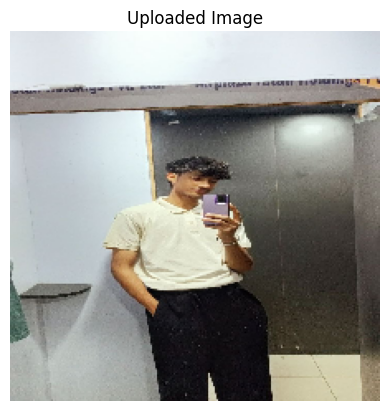

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_image.jpg' with the uploaded file name
img_path = list(uploaded.keys())[0]  # Automatically pick the uploaded file
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 224, 224, 3)
img_array = img_array / 255.0  # Normalize like during training

# Show the image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/person_identity_model.h5')

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

# Get class labels
class_labels = list(train_generator.class_indices.keys())
print(f"Predicted Identity: {class_labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Identity: Shrashti


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 6316808002698593125.jpg to 6316808002698593125.jpg


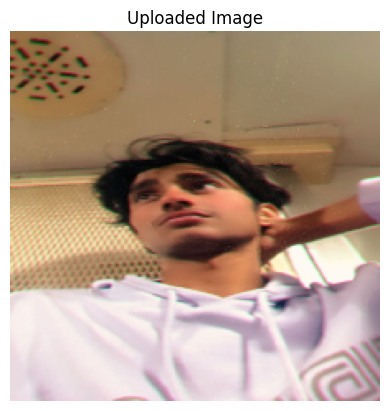

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_image.jpg' with the uploaded file name
img_path = list(uploaded.keys())[0]  # Automatically pick the uploaded file
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 224, 224, 3)
img_array = img_array / 255.0  # Normalize like during training

# Show the image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/person_identity_model.h5')

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

# Get class labels
class_labels = list(train_generator.class_indices.keys())
print(f"Predicted Identity: {class_labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Identity: Sanyam
